# **Hands On Machine Learning**

<img src='https://m.media-amazon.com/images/I/71UF9mDAX3L._AC_UF1000,1000_QL80_.jpg' width=20%><br>
<p>Ensembles</p>

### **Voting Classifier**

Simple set of classifiers voting for result prediction.<br>
There are 2 types:
- Hard Voting Classifiers
- Soft Voting Classifiers

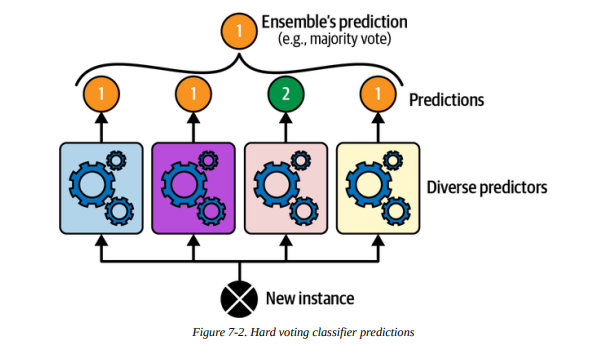

In [31]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [32]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=17)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=17)

In [34]:
X.shape

(500, 2)

In [35]:
import seaborn as sns

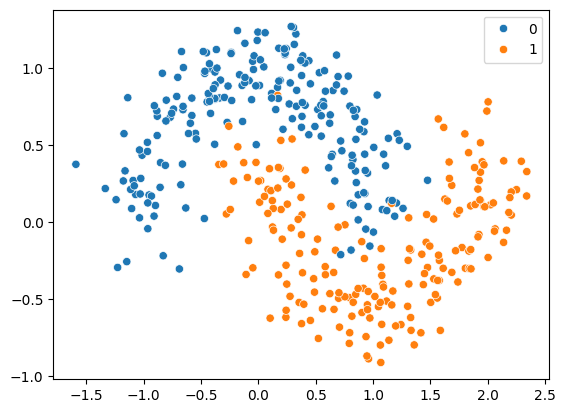

In [36]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train);

In [37]:
voting_clf = VotingClassifier(
    estimators=[
        ('logi', LogisticRegression(random_state=17)),
        ('rand_for', RandomForestClassifier(random_state=17)),
        ('svc', SVC(random_state=17))
    ]
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('logi', LogisticRegression(random_state=17)),
                             ('rand_for',
                              RandomForestClassifier(random_state=17)),
                             ('svc', SVC(random_state=17))])

In [38]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

logi = 0.84
rand_for = 0.95
svc = 0.94


In [39]:
print(voting_clf.predict(X_test[:1]), y_test[0])

[1] 1


Let's see how our voting went

In [40]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([1]), array([1]), array([1])]

In [41]:
voting_clf.score(X_test, y_test)

0.95

<img src='https://vitalflux.com/wp-content/uploads/2020/09/Screenshot-2020-09-07-at-4.40.58-PM-1.png' width=30%><br>
Soft voting

In [42]:
voting_clf.voting = "soft"

# configure svc to predict proba
voting_clf.named_estimators['svc'].probability = True

In [43]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('logi', LogisticRegression(random_state=17)),
                             ('rand_for',
                              RandomForestClassifier(random_state=17)),
                             ('svc', SVC(probability=True, random_state=17))],
                 voting='soft')

In [44]:
for name, clf in voting_clf.named_estimators_.items():
  print(f"{name}, {clf.score(X_test, y_test)}")

logi, 0.84
rand_for, 0.95
svc, 0.94


In [45]:
voting_clf.score(X_test, y_test)

0.94

In general Soft Voting performs better, but not in our case

## **Bagging and Pasting**
Not gonna lie, I'm familiar with this concept from RandomForest.<br>
However it can be used for different estimator<br>

It simply forms smaller training sets by picking random values from train dataset and then trains estimators on these sets.<br>

For regression it predicts *mean* of all predictions<br>
For classification it predicts *majority* class

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [47]:
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=10), n_estimators=500,
    max_samples=100, n_jobs=-1
)

In [48]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                  max_samples=100, n_estimators=500, n_jobs=-1)

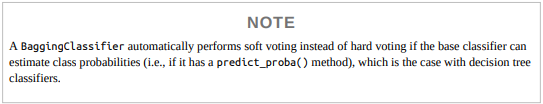

We can also get oob evaluation score after training by specifying

In [49]:
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=10), n_estimators=500,
    max_samples=100, n_jobs=-1, oob_score=True
)

In [50]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True)

In [51]:
bag_clf.oob_score_

0.9575

In [52]:
bag_clf.score(X_test, y_test)

0.95

**Our OOB score was right**

In [53]:
# we can also see oob decision function

In [54]:
# decision function for 0th instance
bag_clf.oob_decision_function_[0]

array([0.89030612, 0.10969388])

## **Random Forest**
I'm familiar with it. Simply it's a bagging classifier with decision trees passed<br>

Good side of RF is Feature importance understanding<br>
We can simply see how important feature is<br>

**It's achieved through checking nodes in each tree of forest containing feature. Getting avg impurity reduction we understand how important feature is**

In [55]:
from sklearn.datasets import load_iris

In [56]:
iris = load_iris(as_frame=True)

In [57]:
forest = RandomForestClassifier(n_estimators=500)
forest.fit(iris.data, iris.target)

RandomForestClassifier(n_estimators=500)

In [58]:
for importance, feature in zip(forest.feature_importances_, iris.data.columns):
  print(f'Feature {feature} has {importance} importance!')

Feature sepal length (cm) has 0.09461723545815619 importance!
Feature sepal width (cm) has 0.024193944914197185 importance!
Feature petal length (cm) has 0.4522080727742036 importance!
Feature petal width (cm) has 0.42898074685344306 importance!


In [59]:
from sklearn.datasets import fetch_openml

X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True, as_frame=False,
                                parser='auto')

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_mnist, y_mnist)

RandomForestClassifier(random_state=42)

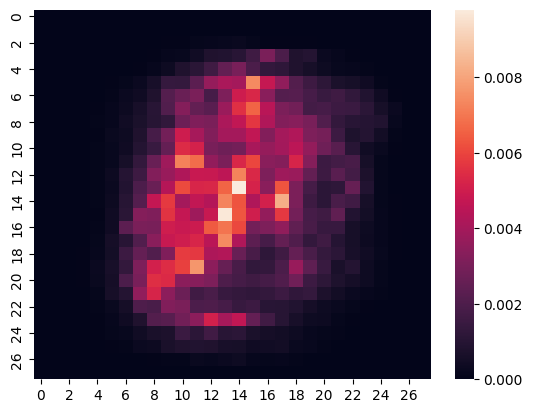

In [60]:
sns.heatmap(rnd_clf.feature_importances_.reshape(28, 28));

As we can see here borders do not matter, because all our digits are in the middle of image

# **Boosting**

## **AdaBoost**
Adaptive boost (AdaBoost) fits a model, finds places where this model underfits and creates a new model with adjusted weights for underfitting feature saving prevous one in sequence<br>

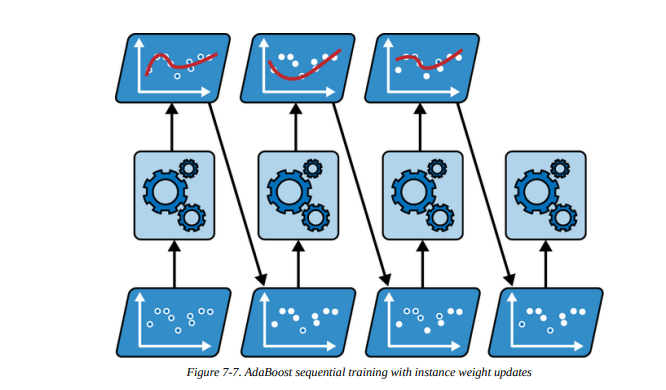

In [63]:
from sklearn.ensemble import AdaBoostClassifier

In [64]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=30,
    learning_rate=0.5, random_state=42
)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=42)

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

In [66]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=3,
                                learning_rate=1, random_state=42)

In [77]:
# btw gb has n_iter_no_change hyperparam.
# It works as an EarlyStopping with n_iter patience

gbr_best = GradientBoostingRegressor(max_depth=2, n_estimators=500,
                                     learning_rate=0.05, n_iter_no_change=10,
                                     random_state=42)

In [78]:
gbr_best.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

In [79]:
gbr_best.n_estimators_

230

**Stacking classifier**
It looks similar to voting models, but stacking clf goes further<br>
Instead of using mean_proba or major class predicted it fits separate model for judging (blender)

In [80]:
from sklearn.ensemble import StackingClassifier

In [84]:
stack_clf = StackingClassifier([
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('svc', SVC())
], final_estimator=RandomForestClassifier(),
cv=5)

In [85]:
stack_clf.fit(X, y)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('rf', RandomForestClassifier()),
                               ('svc', SVC())],
                   final_estimator=RandomForestClassifier())

In [91]:
stack_clf.predict(X_test[[0]])

array([1])

In [98]:
for name, estimator in stack_clf.named_estimators_.items():
  print(f"{name} performed: {estimator.score(X_test, y_test)}")

lr performed: 0.85
rf performed: 1.0
svc performed: 0.94
